In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

First, we attempt to load the CSV file that contains data on earthquakes in the United States from December 2015 to December 2018.

In [2]:
try:
    quake = pd.read_csv("linregdata2.csv")
    print("Earthquake data loaded")
except:
    print("Error loading, check your files6")

Earthquake data loaded


We have over 9000 rows of data with 8 features: 
Year, Month, Day, Hour, Latitude, Longitude, Depth, and Magnitude

In [3]:
quake.shape

(9436, 8)

Next, show the statistics for this dataset.

In [4]:
minimum = quake["mag"].min()
maximum = quake["mag"].max()
stddev = quake["mag"].std()
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Mean:", quake["mag"].mean())
print("Median:", quake["mag"].median())
print("Standard Deviation:", stddev)

Minimum: 2.5
Maximum: 6.3
Mean: 2.9046873675285863
Median: 2.8
Standard Deviation: 0.3974500568871202


Then, graph a histogram describing the frequency of the different magnitudes.

Text(0.5,1,'Frequency of Magnitudes')

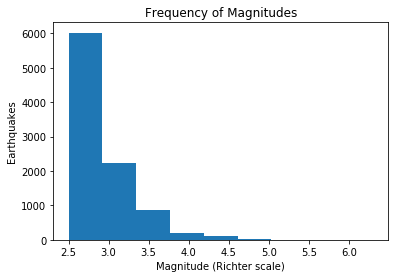

In [5]:
plt.hist(quake["mag"], range=(minimum, maximum), bins=np.int((maximum - minimum ) / stddev))
plt.xlabel("Magnitude (Richter scale)")
plt.ylabel("Earthquakes")
plt.title("Frequency of Magnitudes")

After that, group the earthquakes together by month to see which had the most earthquakes.

In [6]:
month_rate = quake.groupby("month").groups
rate = []
for i in range(1,13):
    val = month_rate[i]
    rate.append(len(val))
    
print("Frequency by month:\n", rate)
print("Missing:\n", sum(rate) - quake.shape[0])

Frequency by month:
 [865, 794, 755, 754, 653, 653, 767, 708, 1314, 623, 639, 911]
Missing:
 0


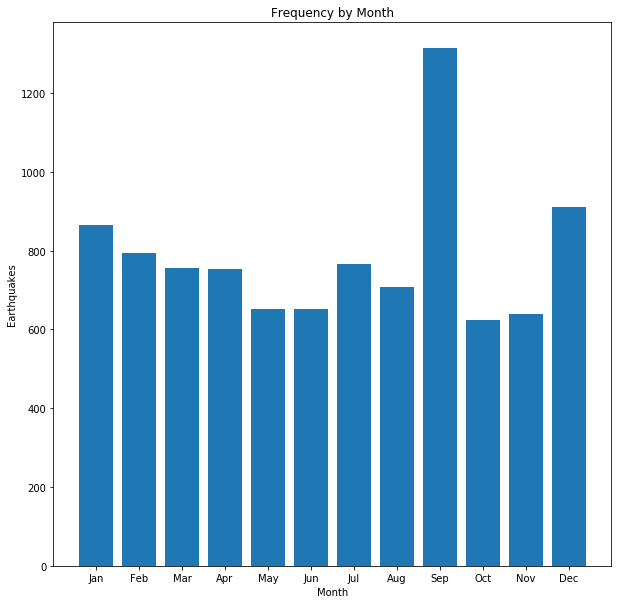

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_positions = np.arange(12)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov",  "Dec"]
bar_heights = rate
ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(0, 12)
ax.set_xticks(tick_positions)
ax.set_xticklabels(months)
plt.title("Frequency by Month")
plt.xlabel("Month")
plt.ylabel("Earthquakes")
plt.show()

Group the earthquakes together by hour of the day, similar to the former step. 

In [8]:
hour_rate = quake.groupby("hour").groups
rate = []
for i in range(0, 24):
    val = hour_rate[i]
    rate.append(len(val))
    
print("Frequency by hour: \n", rate)
print("Missing: \n", sum(rate) - quake.shape[0])

Frequency by hour: 
 [403, 365, 341, 360, 359, 327, 409, 365, 423, 325, 335, 378, 372, 358, 359, 377, 398, 403, 384, 493, 555, 481, 451, 415]
Missing: 
 0


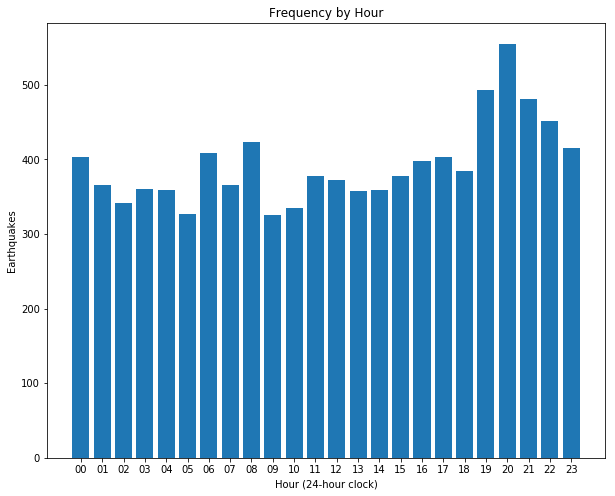

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
bar_positions = np.arange(24)
hours = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"]
bar_heights = rate
ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(0, 24)
ax.set_xticks(tick_positions)
ax.set_xticklabels(hours) 
plt.title("Frequency by Hour")
plt.xlabel("Hour (24-hour clock)")
plt.ylabel("Earthquakes")
plt.show()

To prepare for creating a linear regression, we design a scatterplot that will compare depth to magnitude in an attempt to find some correlation between the two.

Text(0,0.5,'Magnitude')

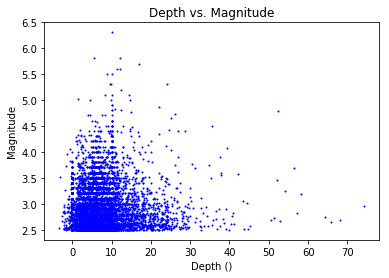

In [10]:
plt.scatter(quake["depth"], quake["mag"], s=1, c="blue")
plt.title("Depth vs. Magnitude")
plt.xlabel("Depth ()")
plt.ylabel("Magnitude")

Looking at these two key features, we discover that there is a very weak, linear relationship between depth and magnitude by observing the correlation coefficient.

In [11]:
X = quake['depth'].values
Y = quake['mag'].values
X1 = X.reshape(len(X), 1)
Y1 = Y.reshape(len(Y), 1)
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)
Y2 = regr.predict(X1)
m2err = np.mean((Y2 - Y1) ** 2)

print("Correlation Coefficient: ", regr.coef_[0][0])
print("Mean squared error: ", m2err)

Correlation Coefficient:  0.0001343467421654218
Mean squared error:  0.15794925051918515


Text(0.5,1,'Linear Regression of Magnitude vs. Depth')

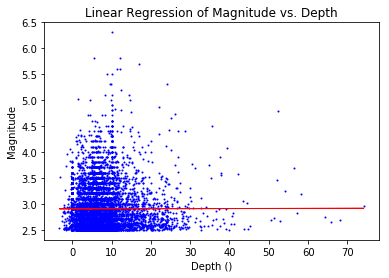

In [12]:
plt.scatter(X1, Y1, s=1, c="blue")
plt.plot(X1, Y2, c="red", linewidth=1)
plt.xlabel("Depth ()")
plt.ylabel("Magnitude")
plt.title("Linear Regression of Magnitude vs. Depth")